In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

In [3]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y = y**2

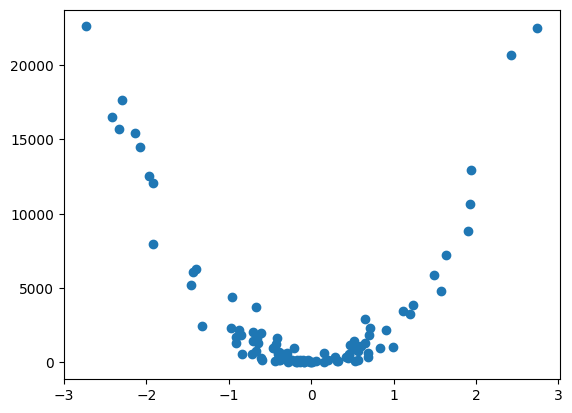

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [ ]:
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))
print(X.shape)

(100, 3)


In [ ]:
theta = np.random.rand(3,1)

# Modèle

In [ ]:
def model(X,theta):
    return X.dot(theta)

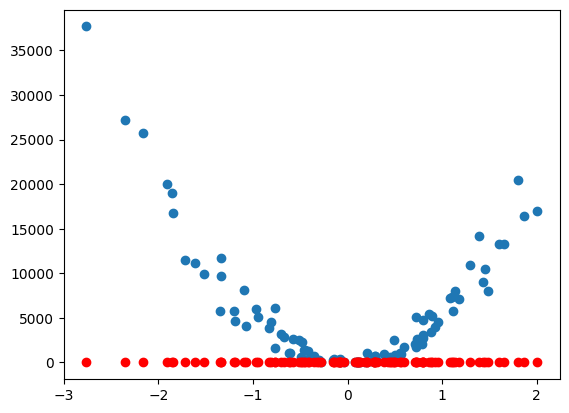

In [ ]:
plt.scatter(x,y)
plt.scatter(x,model(X,theta), c='r')
plt.show()

# Fonction coût

In [ ]:
def cost_function(X,y,theta):
    m = len(y)
    return 1 / (2*m) * np.sum((model(X,theta)-y)**2)

In [ ]:
cost_function(X,y,theta)

35788107.13543733

# Gradients et descente de gradient

In [ ]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [ ]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# Machine learning

In [ ]:
theta_final, cost_history = gradient_descent(X,y,theta, 0.01 ,1000)

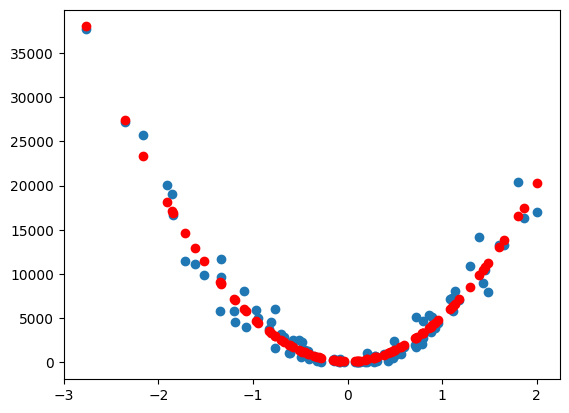

In [ ]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,predictions, c='r')
plt.show()

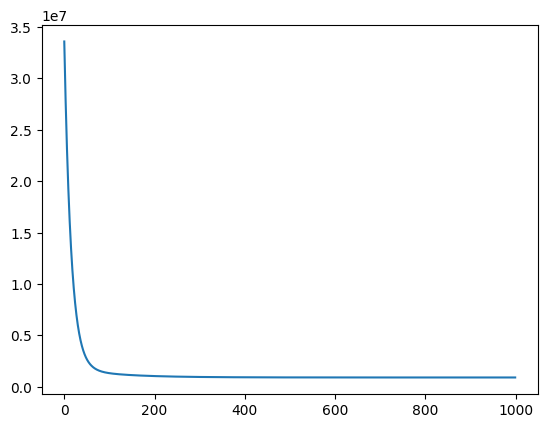

In [ ]:
plt.plot(range(1000), cost_history)
plt.show()

In [ ]:
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coeff_determination(y, predictions)

0.9613135852263005